In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def load_scripts():
    df1 = pd.read_csv('../data/simpsons_script_lines.csv', error_bad_lines=False)\
        .sort_values(['episode_id', 'timestamp_in_ms'])\
        .reset_index()
    
    df2 = pd.read_csv('../data/simpsons_episodes.csv', error_bad_lines=False)[['id', 'season']]
    df2.columns = ['episode_id', 'season']

    df3 = pd.merge(df1, df2, how='left', on='episode_id')
    
    return df3


def get_top(df, n_characters):
    # get top characters by line count
    cts = df.raw_character_text.value_counts()
    top = list(cts[:n_characters].index)
    return top


def longest_line(df, character):
    return list(df[np.where(df.raw_character_text==character, True, False)]\
        .sort_values('word_count', ascending=False)['spoken_words'])[0]

In [9]:
df = load_scripts()

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

In [10]:
print(df.shape)
df.head()

(158248, 15)


,index,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season
0,148751,4,1,3,Homer Simpson: There's no time to be careful.,10000,true,2,2.0,Homer Simpson,Car,There's no time to be careful.,theres no time to be careful,6.0,1
1,148752,5,1,4,Homer Simpson: We're late.,10000,true,2,2.0,Homer Simpson,Car,We're late.,were late,2.0,1
2,149014,263,1,262,Homer Simpson: Who's Tiny Tim?,1001000,true,2,19.0,Homer Simpson,PERSONNEL OFFICE,Who's Tiny Tim?,whos tiny tim,3.0,1
3,149015,264,1,263,(Simpson Home: int. simpson house - night),1006000,false,NaN,5.0,NaN,Simpson Home,NaN,NaN,NaN,1
4,149016,265,1,264,"Bubbles: (FROM TV) Hey, Moldy, do you think Sa...",1006000,true,29,5.0,Bubbles,Simpson Home,"Hey, Moldy, do you think Santa will be able to...",hey moldy do you think santa will be able to f...,17.0,1


In [11]:
N = 20
get_top(df,N)

['Homer Simpson',
 'Marge Simpson',
 'Bart Simpson',
 'Lisa Simpson',
 'C. Montgomery Burns',
 'Moe Szyslak',
 'Seymour Skinner',
 'Ned Flanders',
 'Grampa Simpson',
 'Milhouse Van Houten',
 'Chief Wiggum',
 'Krusty the Clown',
 'Nelson Muntz',
 'Lenny Leonard',
 'Apu Nahasapeemapetilon',
 'Waylon Smithers',
 'Kent Brockman',
 'Carl Carlson',
 'Edna Krabappel-Flanders',
 'Dr. Julius Hibbert']

In [12]:
longest_line(df, 'Grampa Simpson')

'One trick is to tell them stories that don\'t go anywhere... Like the time I caught the ferry over to Shelbyville. I needed a new heel for my shoe, so I decided to go to Morganville, which is what they called Shelbyville in those days. So I tied an onion to my belt, which was the style at the time... now to take the ferry cost a nickel, and in those days nickels had pictures of bumblebees on them. "Give me five bees for a quarter" you\'d say. Now, where were we? Oh yes, the important thing was that I had an onion on my belt, which was the style at the time. They didn\'t have white onions, because of the war...'

In [13]:
df_word_count = df[np.where(df.raw_character_text.isin(get_top(df,100)), True, False)]\
    .groupby('raw_character_text')\
    .agg({'word_count' : ['max', 'count','median']})
df_word_count.columns = ['max', 'count', 'med']
df_word_count.reset_index(inplace=True)
df_word_count = df_word_count.sort_values('max', ascending=False)[:N]
df_word_count = df_word_count.sort_values('count', ascending=False)

In [14]:
df_word_count.head()

,raw_character_text,max,count,med
36,Homer Simpson,114.0,27909,8.0
62,Marge Simpson,87.0,13191,8.0
9,Bart Simpson,74.0,13012,7.0
53,Lisa Simpson,75.0,10767,7.0
12,C. Montgomery Burns,91.0,3087,9.0


In [15]:
df_for_plot = df[np.where(df.raw_character_text.isin(df_word_count.raw_character_text), True, False)]

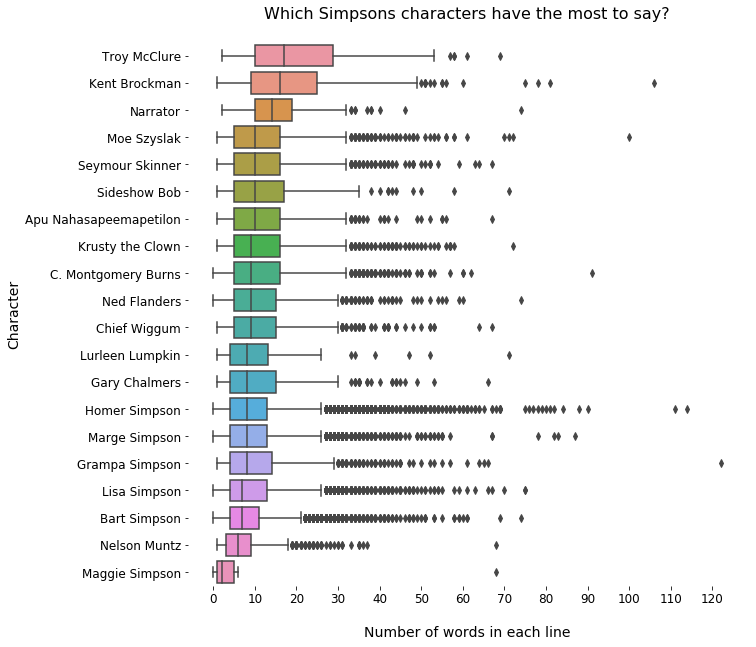

In [17]:
not_top = list(set(df_word_count.raw_character_text.values) - set(get_top(df,30)))
palette = {}
for char in df_word_count.raw_character_text:
    if char in not_top:
        palette[char] = 'yellow'
    else:
        palette[char] = 'tab:blue'

fig = plt.figure(figsize=(10,10))
ax = sns.boxplot(
    x=df_for_plot['word_count'],
    y=df_for_plot.raw_character_text,
    order=df_word_count.sort_values('med', ascending=False).raw_character_text,
#     palette=palette
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(list(range(0,121,10)), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(f'\nNumber of words in each line', fontsize=14)
plt.ylabel('Character', fontsize=14)
plt.title('Which Simpsons characters have the most to say?\n', fontsize=16)
plt.savefig('../plots/box_plot.png', bbox_inches='tight')
plt.show()